# Testing Predictions

This file runs the same code used to investigate the training data on the predicted author results for the test data

## Organize environment

In [1]:
# read in some helpful libraries
import nltk # the natural langauage toolkit, open-source NLP
import pandas as pd # dataframes
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from collections import Counter
from scipy import stats
import string

# initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### Read in training data
This data will be used to develop an identification algorithm

In [2]:
### Read our train data into a dataframe
texts = pd.read_csv("equal_length_test.csv", encoding = 'latin-1')

# look at the first few rows of texts
texts.head()

,id,text,author
0,id02842,This taking a toll from a great crowd of peopl...,EAP
1,id13617,"About the middle of October, , there occurred,...",EAP
2,id08674,On the upper stone lay a white petticoat; on t...,EAP
3,id20084,"Let us follow him to the hippodrome, whither h...",EAP
4,id23324,It is impossible that she could have gone to t...,EAP


## Initial data organization
* Group data by author
* Create object with all sentences for each author
* Create object with all token for each author

In [3]:
# split the data by author
byAuthor = texts.groupby("author")

# create empty dictionary to store combined sentences for each author
sentence_dict = {}

# create empty dictionary to store tokenized sentences for each author
token_dict = {}

# for each author...
for name, group in byAuthor:
    # get all of the sentences they wrote and collapse them into a
    # single long string
    sentences = group['text'].str.cat(sep = ' ')
    
    # convert everything to lower case (so "The" and "the" get counted as 
    # the same word rather than two different words)
    sentences = sentences.lower()
    
    sentence_dict[name] = (sentences)
    
    # split the text into individual tokens (words)  
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    token_dict[name] = (tokens)


## Basic word & sentence structure analysis
* Average sentence length for each author
* Average word length for each author
* Total word variety for each author

### Get Avg sentence length by author

In [4]:
# make a copy of texts to work with
texts_len = texts.copy()

# add the sentence length for each row
texts_len['sentence_len'] = [len(str.split(s)) for s in texts['text']]

# create column to populate with the unique words used in each sentence
texts_len['vocab'] = [len(set(str.split(s))) for s in texts_len['text']]

texts_len.head()

,id,text,author,sentence_len,vocab
0,id02842,This taking a toll from a great crowd of peopl...,EAP,15,14
1,id13617,"About the middle of October, , there occurred,...",EAP,14,13
2,id08674,On the upper stone lay a white petticoat; on t...,EAP,29,24
3,id20084,"Let us follow him to the hippodrome, whither h...",EAP,27,22
4,id23324,It is impossible that she could have gone to t...,EAP,59,50


In [5]:
# get summary data for each author on the sentence length
sentence_summary = pd.DataFrame(texts_len.groupby('author')['sentence_len'].describe())
sentence_summary

,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
EAP,2440.0,27.163525,27.269612,3.0,13.0,22.0,34.0,818.0
HPL,2440.0,26.968033,14.094793,3.0,17.0,25.0,34.0,99.0
MWS,2440.0,25.453689,15.254151,3.0,14.0,23.0,33.0,105.0


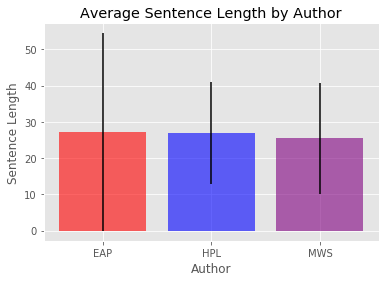

In [6]:
# plot
plt.bar(np.arange(3), sentence_summary['mean'], yerr=sentence_summary['std'], color = ['red', 'blue', 'purple'], alpha = 0.6)
plt.xticks(np.arange(3), sentence_summary.index)
plt.title("Average Sentence Length by Author")
plt.xlabel("Author")
plt.ylabel("Sentence Length")
plt.savefig('test_plots/avg_sentence_length.png', dpi = 300)
plt.show()


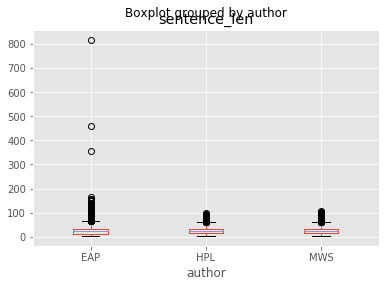

In [7]:
texts_len.boxplot(column = 'sentence_len', by = 'author')
plt.show()

### Get Avg word length by author

In [8]:
# create empty dictionary to populate with average word length by author 
wordlengthByAuthor = {}

# for each author...
for key, value in token_dict.items():
    
    # characterizing words by different lengths
    small_words = len([w for w in value if len(w) <= 5])
    med_words = len([w for w in value if len(w) > 5 & len(w) <10])
    large_words = len([w for w in value if len(w) > 9 & len(w) <15])
    xlarge_words = len([w for w in value if len(w) > 14 & len(w) <15])
    # Average Word Length for each author
    avg_word_length = np.mean([len(w) for w in value])
    # Std Dev of word length for each author
    std_word_length = np.std([len(w) for w in value])
    
    wordlengthByAuthor[key] = ([small_words, med_words, large_words, xlarge_words,avg_word_length, std_word_length])
    
wordlength_df = pd.DataFrame(wordlengthByAuthor, index = ['small (<5)', 'med (5-9)', 'large (10-14)', 
                                                          'xlarge (14+)', 'avg length', 'std'])   
wordlength_df

,EAP,HPL,MWS
small (<5),57197.000000,53954.000000,53384.000000
med (5-9),47050.000000,44550.000000,43263.000000
large (10-14),58676.000000,58237.000000,54987.000000
xlarge (14+),41016.000000,40357.000000,38781.000000
avg length,4.056311,4.172227,4.007102
std,2.637935,2.473238,2.508350


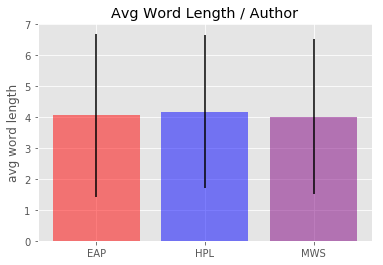

In [9]:
# slicing the 'avg length' row from the avg_len_df
avg_len_df = wordlength_df.iloc[4,:]
avg_len_df = pd.DataFrame(avg_len_df)

# slicing the 'std' row from the std_wordlength_df
std_df = wordlength_df.iloc[5,:]
std_df = pd.DataFrame(std_df)

# creating the plots
y_axis = avg_len_df['avg length']
x_axis = np.arange(0,len(y_axis),1)

# setting tick positions and labels
plt.xticks(x_axis,["EAP","HPL","MWS"])
colors=['red','blue','purple']

plot = plt.bar(x_axis,y_axis,yerr=std_df['std'],color=colors,align='center',alpha=0.5)
plt.title("Avg Word Length / Author")
plt.ylabel("avg word length")

plt.savefig('test_plots/avg_word_length.png', dpi = 300)
plt.show()

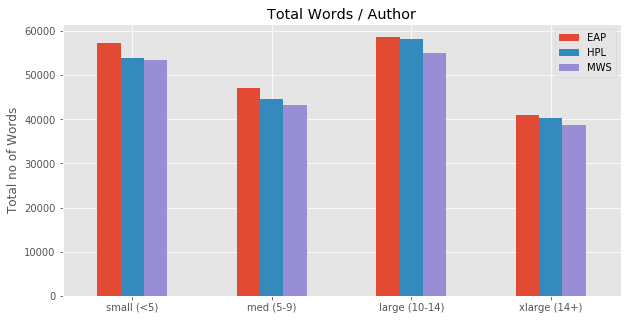

In [10]:
# plotting the words by category for each author with std error bars
wordlength_df2 = wordlength_df.iloc[0:4,:]
wordlength_df2.plot(kind='bar',title = 'Total Words / Author',
                    legend=True, rot=0, figsize=(10, 5))
plt.ylabel('Total no of Words')
plt.savefig('test_plots/total_words_by_size.png', dpi = 300)
plt.show()

### Get total word variety by author

In [11]:
# create empty dictionary to store the number of unique words used by each author
vocabulary = {}

# for each author
for key, value in token_dict.items():
    unique_words = set(value)
    len_unique_words = len(unique_words)
    vocabulary[key] = (len_unique_words)
    
#vocabulary_df = pd.DataFrame(vocabulary)
#vocabulary_df
vocabulary

{'EAP': 9203, 'HPL': 9431, 'MWS': 7402}

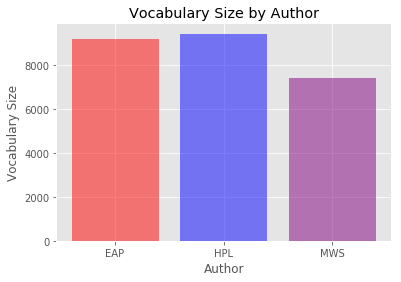

In [12]:
# plot
plt.bar(np.arange(3), vocabulary.values(), color = ['red', 'blue', 'purple'], alpha = 0.5)
plt.xticks(np.arange(3), vocabulary.keys())
plt.title("Vocabulary Size by Author")
plt.xlabel("Author")
plt.ylabel("Vocabulary Size")
plt.savefig('test_plots/vocabulary_size.png', dpi = 300)
plt.show()

## Part of speech analysis

### Pronoun usage

In [13]:
# Get parts-of-speech for each author using 

firstPerson = ['i', 'me', 'we', 'us']
secondPerson = ['you'] 
thirdPerson = ['he', 'she', 'it', 'him', 'her', 'it', 'they', 'them']
firstCount = {}
secondCount = {}
thirdCount = {}

for key in token_dict:
    counts = Counter(token_dict[key])
    firstCount[key] = { pronoun: counts[pronoun] for pronoun in firstPerson }
    secondCount[key] = { pronoun: counts[pronoun] for pronoun in secondPerson } 
    thirdCount[key] = { pronoun: counts[pronoun] for pronoun in thirdPerson } 

In [14]:
# unpack dictionaries into DataFrames 
authors = ['EAP', 'HPL', 'MWS']
first = []
second = []
third = []

# df for first person pronouns
for name in authors:
    temp = []
    pronoun = []
    values = []
    for key, value in firstCount[name].items():
        temp = [key,value]
        pronoun.append(temp[0])
        values.append(temp[1])
    df1 = pd.DataFrame({'Pronoun': pronoun,
                 name: values,
                }).set_index('Pronoun')
    first.append(df1)
first = pd.concat(first, axis=1)

# df for second person pronouns
for name in authors:
    temp = []
    pronoun = []
    values = []
    for key, value in secondCount[name].items():
        temp = [key,value]
        pronoun.append(temp[0])
        values.append(temp[1])
    df1 = pd.DataFrame({'Pronoun': pronoun,
                 name: values,
                }).set_index('Pronoun')
    second.append(df1)
second = pd.concat(second, axis=1)

# df for third person pronouns
for name in authors:
    temp = []
    pronoun = []
    values = []
    for key, value in thirdCount[name].items():
        temp = [key,value]
        pronoun.append(temp[0])
        values.append(temp[1])
    df1 = pd.DataFrame({'Pronoun': pronoun,
                 name: values,
                }).set_index('Pronoun')
    third.append(df1)
third = pd.concat(third, axis=1)

third

,EAP,HPL,MWS
Pronoun,,,
he,364,633,576
she,75,20,383
it,794,627,462
him,116,224,264
her,152,43,565
they,99,299,197
them,90,125,146


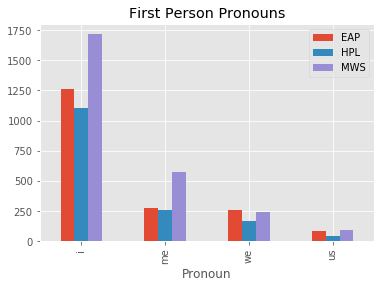

In [15]:
# Plot pronoun DataFrames
first.plot(kind ='bar')
plt.title('First Person Pronouns')
plt.savefig('test_plots/first_person.png', dpi = 300)
plt.show()

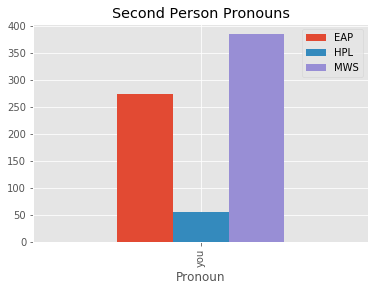

In [16]:
second.plot(kind ='bar')
plt.title('Second Person Pronouns')
plt.savefig('test_plots/second_person.png', dpi = 300)
plt.show()

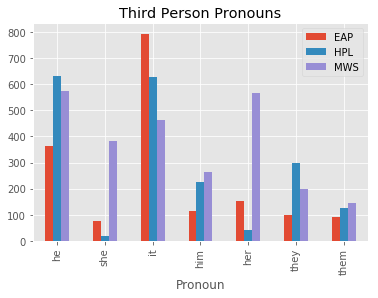

In [17]:
third.plot(kind = 'bar')
plt.title('Third Person Pronouns')
plt.savefig('test_plots/third_person.png', dpi = 300)
plt.show()

### Other parts of speech

In [18]:
# Get parts-of-speech for each author using 
partOfSpeech = {}

for key, value in token_dict.items():
    
    partOfSpeech[key] = nltk.pos_tag(value)

partOfSpeech

{'EAP': [('this', 'DT'),
  ('taking', 'VBG'),
  ('a', 'DT'),
  ('toll', 'NN'),
  ('from', 'IN'),
  ('a', 'DT'),
  ('great', 'JJ'),
  ('crowd', 'NN'),
  ('of', 'IN'),
  ('people', 'NNS'),
  ('is', 'VBZ'),
  ('an', 'DT'),
  ('excessively', 'RB'),
  ('troublesome', 'JJ'),
  ('thing', 'NN'),
  ('.', '.'),
  ('about', 'IN'),
  ('the', 'DT'),
  ('middle', 'NN'),
  ('of', 'IN'),
  ('october', 'NN'),
  (',', ','),
  (',', ','),
  ('there', 'EX'),
  ('occurred', 'VBD'),
  (',', ','),
  ('however', 'RB'),
  (',', ','),
  ('a', 'DT'),
  ('day', 'NN'),
  ('of', 'IN'),
  ('remarkable', 'JJ'),
  ('chilliness', 'NN'),
  ('.', '.'),
  ('on', 'IN'),
  ('the', 'DT'),
  ('upper', 'JJ'),
  ('stone', 'NN'),
  ('lay', 'VBD'),
  ('a', 'DT'),
  ('white', 'JJ'),
  ('petticoat', 'NN'),
  (';', ':'),
  ('on', 'IN'),
  ('the', 'DT'),
  ('second', 'JJ'),
  ('a', 'DT'),
  ('silk', 'NN'),
  ('scarf', 'NN'),
  (';', ':'),
  ('scattered', 'VBN'),
  ('around', 'IN'),
  (',', ','),
  ('were', 'VBD'),
  ('a', 'DT'),
  ('

In [19]:
# Count the the number of parts of speech for each author 

# create an empty dictonary to hold all of the counts
partOfSpeechCounts = {}
for name in partOfSpeech: 
     partOfSpeechCounts[name] = Counter(elem[1] for elem in partOfSpeech[name])
        
partOfSpeechCounts

{'EAP': Counter({"''": 573,
          ',': 5686,
          '.': 2539,
          ':': 571,
          'CC': 2679,
          'CD': 465,
          'DT': 8260,
          'EX': 181,
          'FW': 100,
          'IN': 9717,
          'JJ': 5363,
          'JJR': 219,
          'JJS': 142,
          'MD': 879,
          'NN': 12887,
          'NNP': 52,
          'NNS': 2762,
          'PDT': 85,
          'POS': 167,
          'PRP': 2673,
          'PRP$': 1592,
          'RB': 4224,
          'RBR': 159,
          'RBS': 83,
          'RP': 202,
          'TO': 1500,
          'UH': 25,
          'VB': 2249,
          'VBD': 3358,
          'VBG': 1087,
          'VBN': 2101,
          'VBP': 1006,
          'VBZ': 1033,
          'WDT': 588,
          'WP': 310,
          'WP$': 45,
          'WRB': 283,
          '``': 552}),
 'HPL': Counter({"''": 179,
          ',': 3609,
          '.': 2511,
          ':': 529,
          'CC': 3317,
          'CD': 321,
          'DT': 7684,
        

### Punctuation

In [20]:
# visualise the above in a dataframe
speech_parts_df = pd.DataFrame(partOfSpeechCounts)
speech_parts_df
speech_parts_df.index

Index(['''', ',', '.', ':', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR',
       'JJS', 'MD', 'NN', 'NNP', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB',
       'RBR', 'RBS', 'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',
       'WDT', 'WP', 'WP$', 'WRB', '``'],
      dtype='object')

In [21]:
# from the string library, pull the list of punctuations
punctuation = set(string.punctuation)
# Add in the missing punctuations 
punctuation.add('``')
punctuation.add('\'\'')
punctuation

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '``',
 '{',
 '|',
 '}',
 '~'}

In [22]:
# iterate through the rows of speech_parts_df and drop the rows if the index is not punctuation mark
for index,row in speech_parts_df.iterrows():
    if(index not in punctuation):
        speech_parts_df = speech_parts_df.drop(index)
        
speech_parts_df

,EAP,HPL,MWS
'',573,179,261
",",5686,3609,4367
.,2539,2511,2466
:,571,529,1175
``,552,92,302


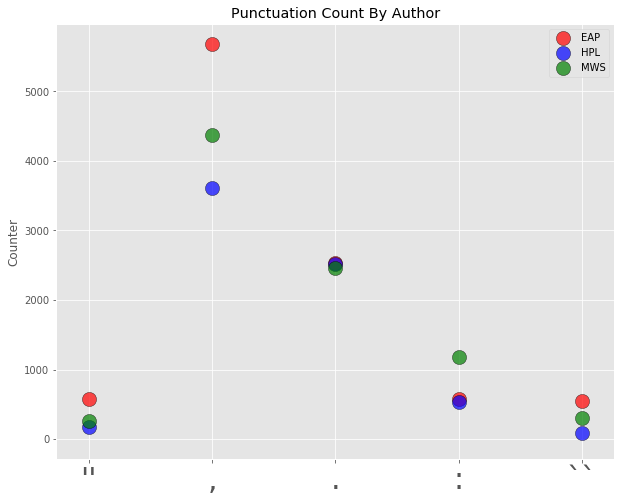

In [23]:
# scatter plot for count of punctuation types by author
xticks = ["''",',','.',':','``']
x_axis = np.arange(0,len(speech_parts_df),1)

y_EAP_axis = speech_parts_df['EAP']
y_HPL_axis = speech_parts_df["HPL"]
y_MWS_axis = speech_parts_df["MWS"]

plt.figure(figsize=(10,8))

EAP_handle = plt.scatter(x=x_axis,y=y_EAP_axis,marker='o',color='r',edgecolors='black',s=200,alpha=0.7,label="EAP") 
HPL_handle = plt.scatter(x=x_axis,y=y_HPL_axis,marker='o',color='b',edgecolors='black',s=200,alpha=0.7,label="HPL") 
MWS_handle = plt.scatter(x=x_axis,y=y_MWS_axis,marker='o',color='g',edgecolors='black',s=200,alpha=0.7,label="MWS") 

plt.legend(handles=[EAP_handle,HPL_handle,MWS_handle],loc='best')

plt.xticks(x_axis,xticks,fontsize=30)
plt.ylabel("Counter")
plt.title("Punctuation Count By Author")

plt.show()

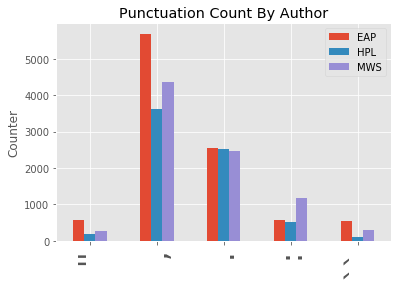

In [24]:
speech_parts_df.plot(kind = 'bar')
xticks = ["''",',','.',':','``']
plt.xticks(x_axis,xticks,fontsize=30)
plt.ylabel("Counter")
plt.title("Punctuation Count By Author")
plt.savefig('test_plots/punctuation.png', dpi = 300)
plt.show()

### Get word frequencies by author

## Sentiment analysis

In [25]:
# Sentiments analysis including : avg sentiment scores, std of sentiment scores, scatter plots for compound sentiment 
# analysis by Author 

sentimentByAuthor = {}

for name, group in byAuthor:
# collect sentiment analysis scores
    results = [analyzer.polarity_scores(w) for w in group['text']]
    sentimentByAuthor[name] = (results)
    
sentimentByAuthor

{'EAP': [{'compound': 0.2023, 'neg': 0.179, 'neu': 0.598, 'pos': 0.223},
  {'compound': 0.5574, 'neg': 0.0, 'neu': 0.753, 'pos': 0.247},
  {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
  {'compound': 0.2617, 'neg': 0.0, 'neu': 0.927, 'pos': 0.073},
  {'compound': -0.5267, 'neg': 0.073, 'neu': 0.927, 'pos': 0.0},
  {'compound': 0.5777, 'neg': 0.0, 'neu': 0.903, 'pos': 0.097},
  {'compound': -0.296, 'neg': 0.239, 'neu': 0.761, 'pos': 0.0},
  {'compound': 0.0258, 'neg': 0.089, 'neu': 0.805, 'pos': 0.107},
  {'compound': 0.872, 'neg': 0.0, 'neu': 0.794, 'pos': 0.206},
  {'compound': -0.0504, 'neg': 0.038, 'neu': 0.928, 'pos': 0.034},
  {'compound': 0.7269, 'neg': 0.0, 'neu': 0.567, 'pos': 0.433},
  {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
  {'compound': -0.4588, 'neg': 0.16, 'neu': 0.84, 'pos': 0.0},
  {'compound': -0.5267, 'neg': 0.145, 'neu': 0.855, 'pos': 0.0},
  {'compound': -0.8029, 'neg': 0.152, 'neu': 0.776, 'pos': 0.072},
  {'compound': 0.0, 'neg': 0.0, 'neu'

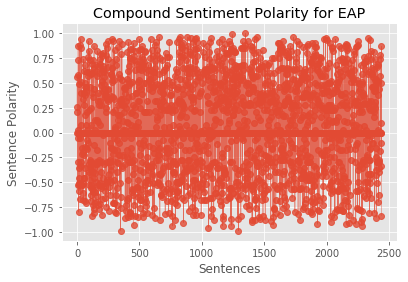

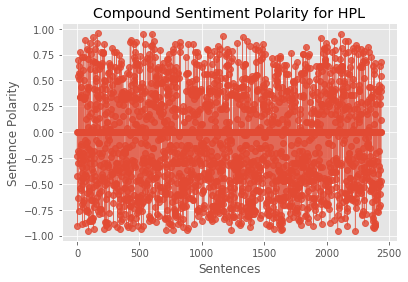

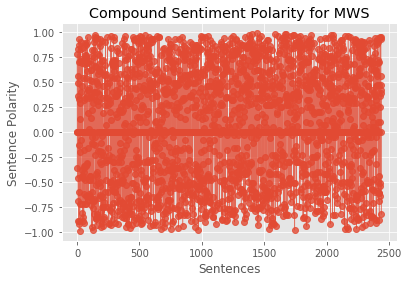

In [26]:
# create empty dictionaries to contain avg sentiment values for all sentences by authors
avg_compound = {}
avg_pos = {}
avg_neu = {}
avg_neg = {}

# create empty dictionaries to contain std of sentiments for all sentences by authors
std_compound = {}
std_pos = {}
std_neu = {}
std_neg = {}

for name, group in byAuthor:
    compound = [d['compound'] for d in sentimentByAuthor[name]]
    pos = [d['pos'] for d in sentimentByAuthor[name]]
    neu = [d['neu'] for d in sentimentByAuthor[name]]
    neg = [d['neg'] for d in sentimentByAuthor[name]]
    
    avg_compound[name] = sum(compound) / len(sentimentByAuthor[name])
    avg_pos[name] = sum(pos) / len(sentimentByAuthor[name])
    avg_neu[name] = sum(neu) / len(sentimentByAuthor[name])
    avg_neg[name] = sum(neg) / len(sentimentByAuthor[name])
    
    std_compound[name] = np.std(compound, axis = None)
    std_pos[name] = np.std(pos, axis = None)
    std_neu[name] = np.std(neu, axis = None)
    std_neg[name] = np.std(neg, axis = None)
    
    # plot compound sentiment analysis for each author
    #plt.figure(figsize = (10,10))
    plt.title('Compound Sentiment Polarity for ' + name)
    plt.xlabel('Sentences')
    plt.ylabel('Sentence Polarity')
    plt.plot(np.arange(0, len(compound)), compound,  marker="o", linewidth=0.5,
         alpha=0.8)
    plt.show()

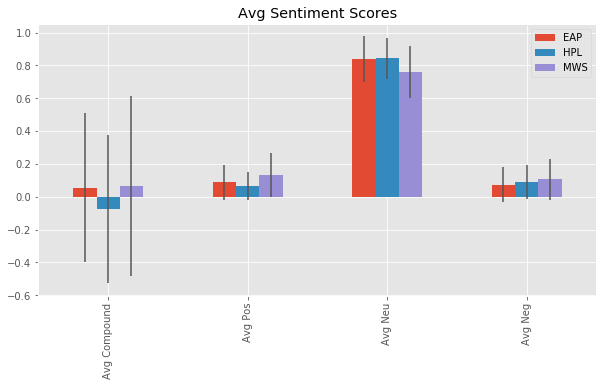

,EAP,HPL,MWS
Avg Compound,0.055392,-0.076894,0.063452
Avg Pos,0.087692,0.064917,0.131719
Avg Neu,0.838467,0.844170,0.761258
Avg Neg,0.073840,0.090911,0.107025


In [27]:
# plot bar graph of avg sentiment scores with error bars for each author 


avg_sentiments = {'EAP':[avg_compound['EAP'], avg_pos['EAP'], avg_neu['EAP'] ,avg_neg['EAP']],
                  'HPL': [avg_compound['HPL'], avg_pos['HPL'], avg_neu['HPL'] ,avg_neg['HPL']],
                  'MWS': [avg_compound['MWS'], avg_pos['MWS'], avg_neu['MWS'] ,avg_neg['MWS']]}
std_sentiments = {'EAP':[std_compound['EAP'], std_pos['EAP'], std_neu['EAP'] ,std_neg['EAP']],
                  'HPL': [std_compound['HPL'], std_pos['HPL'], std_neu['HPL'] ,std_neg['HPL']],
                  'MWS': [std_compound['MWS'], std_pos['MWS'], std_neu['MWS'] ,std_neg['MWS']]}
indexNames = ['Avg Compound', 'Avg Pos', 'Avg Neu', 'Avg Neg']
avg_sentimentsdf = pd.DataFrame(avg_sentiments, index = indexNames) 
std_sentimentsdf = pd.DataFrame(std_sentiments, index = indexNames)
    
#plt.figure(figsize = (10,10))
ax = avg_sentimentsdf.plot(kind = 'bar', title = 'Avg Sentiment Scores', 
                      legend=True , yerr= std_sentimentsdf, figsize=(10, 5))
plt.savefig('test_plots/sentiment_scores.png', dpi = 300)
plt.show()

avg_sentimentsdf

## ANOVA analyses

### Sentence length

In [28]:
grps = pd.unique(texts_len.author.values)
sent_len = {grp:texts_len['sentence_len'][texts_len.author == grp] for grp in grps}

F, p = stats.f_oneway(sent_len['EAP'], sent_len['HPL'], sent_len['MWS'])

print(F)
print(p)

5.45632428889
0.00428660805919


### Word variety

In [29]:
vocab = {grp:texts_len['vocab'][texts_len.author == grp] for grp in grps}

F, p = stats.f_oneway(vocab['EAP'], vocab['HPL'], vocab['MWS'])

print(F)
print(p)

7.78955817019
0.000417478594139


### Word length

In [30]:
# create empty dictionary to populate with word lengths by author 
wordlengthByAuthor_all = {}

# for each author...
for key, value in token_dict.items():
    
    # characterizing words by different lengths
    word_len = [len(w) for w in value]
    wordlengthByAuthor_all[key] = word_len
    
F, p = stats.f_oneway(wordlengthByAuthor_all['EAP'], wordlengthByAuthor_all['HPL'], wordlengthByAuthor_all['MWS'])

print(F)
print(p)

80.4990604524
1.12841526448e-35
